**INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY**
 

 
**Maestría en Inteligencia Artificial**

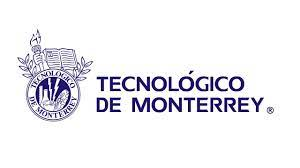

**Presenta:**
**Actividad Semanal 6**

**Tema:**
**Visualización**

**Materia:**
<!--  -->
**TC4029.10 - Ciencia y Análitica de Datos**

**Profesor Titular:**
**Dra. María de la Paz Rico Fernández**

**Alumno:**

*   **A01793625 - Luis Angel Hermenegildo Dominguez**




**noviembre de 2022**


**El nombre que caracteriza el conjunto de datos:**

The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients


**URL DE LOS DATOS**

https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv

https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt
 (Yeh, 2009)

In [53]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


1. Descarga los datos Enlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

In [74]:
#HP: Historial de Pago (History of past payment)
#EC: Estado de cuenta(Amount of bill statement)
#PA: Pagos Anteriores(Amount of previous payment)
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col=0)
df.rename(columns = {'X1' : 'Monto_credito', 'X2': 'Genero','X3':'Educacion','X4':'Estado_civil','X5':'Edad','X6':'HP_Sep','X7':'HP_Ago','X8':'HP_Jul','X9':'HP_Jun','X10':'HP_May','X11':'HP_Abr','X12':'EC_Sep','X13':'EC_Ago','X14':'EC_Jul','X15':'EC_Jun','X16':'EC_May','X17':'EC_Abr','X18':'PA_Sep','X19':'PA_Ago','X20':'PA_Jul','X21':'PA_Jun','X22':'PA_May','X23':'PA_Abr','Y':'Aprobado'}, inplace = True)

2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [3]:
df.shape

(30000, 24)

In [4]:
df.columns

Index(['Monto_credito', 'Genero', 'Educacion', 'Estado_civil', 'Edad',
       'HP_Sep', 'HP_Ago', 'HP_Jul', 'HP_Jun', 'HP_May', 'HP_Abr', 'EC_Sep',
       'EC_Ago', 'EC_Jul', 'EC_Jun', 'EC_May', 'EC_Abr', 'PA_Sep', 'PA_Ago',
       'PA_Jul', 'PA_Jun', 'PA_May', 'PA_Abr', 'Aprobado'],
      dtype='object')

In [5]:
df.head()

Monto_credito  Genero  Educacion  Estado_civil  Edad  HP_Sep  HP_Ago  \
ID                                                                         
1           20000     2.0        2.0           1.0  24.0     2.0     2.0   
2          120000     2.0        2.0           2.0  26.0    -1.0     2.0   
3           90000     2.0        2.0           2.0  34.0     0.0     0.0   
4           50000     2.0        2.0           1.0  37.0     0.0     0.0   
5           50000     1.0        2.0           1.0  57.0    -1.0     0.0   

    HP_Jul  HP_Jun  HP_May  ...   EC_Jun   EC_May   EC_Abr  PA_Sep   PA_Ago  \
ID                          ...                                               
1     -1.0    -1.0    -2.0  ...      0.0      0.0      0.0     0.0    689.0   
2      0.0     0.0     0.0  ...   3272.0   3455.0   3261.0     0.0   1000.0   
3      0.0     0.0     0.0  ...  14331.0  14948.0  15549.0  1518.0   1500.0   
4      0.0     0.0     0.0  ...  28314.0  28959.0  29547.0  2000.0   2019.0   
5     -1.0     0.0     0.0  ...  20940.0  19146.0  19131.0  2000.0  36681.0   

     PA_Jul  PA_Jun  PA_May  PA_Abr  Aprobado  
ID                                             
1       0.0     0.0     0.0     0.0       1.0  
2    1000.0  1000.0     0.0  2000.0       1.0  
3    1000.0  1000.0  1000.0  5000.0       0.0  
4    1200.0  1100.0  1069.0  1000.0       0.0  
5   10000.0  9000.0   689.0   679.0       0.0  

[5 rows x 24 columns]

In [6]:
df.dtypes

Monto_credito      int64
Genero           float64
Educacion        float64
Estado_civil     float64
Edad             float64
HP_Sep           float64
HP_Ago           float64
HP_Jul           float64
HP_Jun           float64
HP_May           float64
HP_Abr           float64
EC_Sep           float64
EC_Ago           float64
EC_Jul           float64
EC_Jun           float64
EC_May           float64
EC_Abr           float64
PA_Sep           float64
PA_Ago           float64
PA_Jul           float64
PA_Jun           float64
PA_May           float64
PA_Abr           float64
Aprobado         float64
dtype: object

In [7]:
df.info

<bound method DataFrame.info of        Monto_credito  Genero  Educacion  Estado_civil  Edad  HP_Sep  HP_Ago  \
ID                                                                            
1              20000     2.0        2.0           1.0  24.0     2.0     2.0   
2             120000     2.0        2.0           2.0  26.0    -1.0     2.0   
3              90000     2.0        2.0           2.0  34.0     0.0     0.0   
4              50000     2.0        2.0           1.0  37.0     0.0     0.0   
5              50000     1.0        2.0           1.0  57.0    -1.0     0.0   
...              ...     ...        ...           ...   ...     ...     ...   
29996         220000     1.0        3.0           1.0  39.0     0.0     0.0   
29997         150000     1.0        3.0           2.0  43.0    -1.0    -1.0   
29998          30000     1.0        2.0           2.0  37.0     4.0     3.0   
29999          80000     1.0        3.0           1.0  41.0     1.0    -1.0   
30000          50000

In [69]:
df.isnull().values.any()

False

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [71]:
#Identificar las variables categoricas de las numericas
categorical_features = ['Genero','Educacion','Estado_civil']
numeric_features = ['Monto_credito', 'Edad',
       'HP_Sep', 'HP_Ago', 'HP_Jul', 'HP_Jun', 'HP_May', 'HP_Abr', 'EC_Sep',
       'EC_Ago', 'EC_Jul', 'EC_Jun', 'EC_May', 'EC_Abr', 'PA_Sep', 'PA_Ago',
       'PA_Jul', 'PA_Jun', 'PA_May', 'PA_Abr', 'Aprobado']

In [86]:
#Se definen pipelines para realizar la transformación de los datos y rellenar los datos nulos
num_pipeline = Pipeline(steps = [('impMean', SimpleImputer(strategy='median'))])
cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])


# Se integran los pipelines anteriores y se especifica que las columnas no declaradas en categorical_featues y numeric_features también se conserven
ct = ColumnTransformer(
    transformers = [
        ('categorical_data_pre', cat_pipeline, categorical_features),
        ('numerical_data_pre', num_pipeline, numeric_features),
        
    ],
    remainder="passthrough"
)


In [95]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical_data_pre',
                                 Pipeline(steps=[('impModa',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Genero', 'Educacion', 'Estado_civil']),
                                ('numerical_data_pre',
                                 Pipeline(steps=[('impMean',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Monto_credito', 'Edad', 'HP_Sep', 'HP_Ago',
                                  'HP_Jul', 'HP_Jun', 'HP_May', 'HP_Abr',
                                  'EC_Sep', 'EC_Ago', 'EC_Jul', 'EC_Jun',
                                  'EC_May', 'EC_Abr', 'PA_Sep', 'PA_Ago',
                                  'PA_Jul', 'PA_Jun', 'PA_May', 'PA_Abr',
                                  'Aprobado'])])

In [106]:
#pipeline = Pipeline(steps=[('ct',columnTransfomer), ('m',LinearRegression()])

ndf = ct.fit_transform(df)
df = pd.DataFrame(ndf, columns= categorical_features + numeric_features)
scaled_df.head()

Genero  Educacion  Estado_civil  Monto_credito  Edad  HP_Sep  HP_Ago  \
0     2.0        2.0           1.0        20000.0  24.0     2.0     2.0   
1     2.0        2.0           2.0       120000.0  26.0    -1.0     2.0   
2     2.0        2.0           2.0        90000.0  34.0     0.0     0.0   
3     2.0        2.0           1.0        50000.0  37.0     0.0     0.0   
4     1.0        2.0           1.0        50000.0  57.0    -1.0     0.0   

   HP_Jul  HP_Jun  HP_May  ...   EC_Jun   EC_May   EC_Abr  PA_Sep   PA_Ago  \
0    -1.0    -1.0    -2.0  ...      0.0      0.0      0.0     0.0    689.0   
1     0.0     0.0     0.0  ...   3272.0   3455.0   3261.0     0.0   1000.0   
2     0.0     0.0     0.0  ...  14331.0  14948.0  15549.0  1518.0   1500.0   
3     0.0     0.0     0.0  ...  28314.0  28959.0  29547.0  2000.0   2019.0   
4    -1.0     0.0     0.0  ...  20940.0  19146.0  19131.0  2000.0  36681.0   

    PA_Jul  PA_Jun  PA_May  PA_Abr  Aprobado  
0      0.0     0.0     0.0     0.0       1.0  
1   1000.0  1000.0     0.0  2000.0       1.0  
2   1000.0  1000.0  1000.0  5000.0       0.0  
3   1200.0  1100.0  1069.0  1000.0       0.0  
4  10000.0  9000.0   689.0   679.0       0.0  

[5 rows x 24 columns]

In [108]:
#Sin valores vacios
df[df.isnull().any(1)]

Empty DataFrame
Columns: [Genero, Educacion, Estado_civil, Monto_credito, Edad, HP_Sep, HP_Ago, HP_Jul, HP_Jun, HP_May, HP_Abr, EC_Sep, EC_Ago, EC_Jul, EC_Jun, EC_May, EC_Abr, PA_Sep, PA_Ago, PA_Jul, PA_Jun, PA_May, PA_Abr, Aprobado]
Index: []

[0 rows x 24 columns]

In [111]:
df.isnull().values.any()

False

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [112]:
categorical_features

['Genero', 'Educacion', 'Estado_civil']

In [113]:
numeric_features

['Monto_credito',
 'Edad',
 'HP_Sep',
 'HP_Ago',
 'HP_Jul',
 'HP_Jun',
 'HP_May',
 'HP_Abr',
 'EC_Sep',
 'EC_Ago',
 'EC_Jul',
 'EC_Jun',
 'EC_May',
 'EC_Abr',
 'PA_Sep',
 'PA_Ago',
 'PA_Jul',
 'PA_Jun',
 'PA_May',
 'PA_Abr',
 'Aprobado']

In [114]:
#Describir las variables categoricas
df[categorical_features].describe()

#Count: Cuenta el numero de registros
#Mean: Calcula el promedio de los datos
#Std: Calcula la desviación estandar
#min: Valor mínimo
#max: Valor máximo
#Por otra parte en lo que respecta al 25%, 50% y 75% 
#miden el grado de dispersión de los valores de la variable.


Genero     Educacion  Estado_civil
count  30000.000000  30000.000000  30000.000000
mean       1.603767      1.853067      1.551933
std        0.489122      0.790294      0.521963
min        1.000000      0.000000      0.000000
25%        1.000000      1.000000      1.000000
50%        2.000000      2.000000      2.000000
75%        2.000000      2.000000      2.000000
max        2.000000      6.000000      3.000000

In [115]:
#Describir las variables categoricas
df[numeric_features].describe()

#Count: Cuenta el numero de registros
#Mean: Calcula el promedio de los datos
#Std: Calcula la desviación estandar
#min: Valor mínimo
#max: Valor máximo
#Por otra parte en lo que respecta al 25%, 50% y 75% 
#miden el grado de dispersión de los valores de la variable.

Monto_credito          Edad        HP_Sep        HP_Ago        HP_Jul  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667     35.483967     -0.016633     -0.133667     -0.166367   
std     129747.661567      9.217276      1.123773      1.197155      1.195911   
min      10000.000000     21.000000     -2.000000     -2.000000     -2.000000   
25%      50000.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%     140000.000000     34.000000      0.000000      0.000000      0.000000   
75%     240000.000000     41.000000      0.000000      0.000000      0.000000   
max    1000000.000000     79.000000      8.000000      8.000000      8.000000   

             HP_Jun        HP_May        HP_Abr         EC_Sep         EC_Ago  \
count  30000.000000  30000.000000  30000.000000   30000.000000   30000.000000   
mean      -0.220733     -0.266200     -0.291000   51226.284467   49180.473967   
std        1.168983      1.133011      1.149882   73633.787601   71172.349726   
min       -2.000000     -2.000000     -2.000000 -165580.000000  -69777.000000   
25%       -1.000000     -1.000000     -1.000000    3566.750000    2986.750000   
50%        0.000000      0.000000      0.000000   22387.000000   21207.000000   
75%        0.000000      0.000000      0.000000   67091.000000   64006.250000   
max        8.000000      8.000000      8.000000  964511.000000  983931.000000   

       ...         EC_Jun         EC_May         EC_Abr         PA_Sep  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43263.540500   40311.904067   38873.869033    5661.995767   
std    ...   64331.690439   60795.051774   59552.714581   16562.058487   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2332.000000    1769.500000    1258.500000    1000.000000   
50%    ...   19052.000000   18107.000000   17081.000000    2100.000000   
75%    ...   54506.000000   50177.000000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

             PA_Ago        PA_Jul         PA_Jun         PA_May  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921315e+03    5224.70990    4826.032533    4799.087100   
std    2.304082e+04   17606.16345   15666.008524   15278.170888   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.360000e+02     390.00000     298.000000     254.750000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4504.25000    4013.000000    4031.000000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

              PA_Abr      Aprobado  
count   30000.000000  30000.000000  
mean     5215.640600      0.221167  
std     17777.431407      0.415039  
min         0.000000      0.000000  
25%       118.000000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 21 columns]

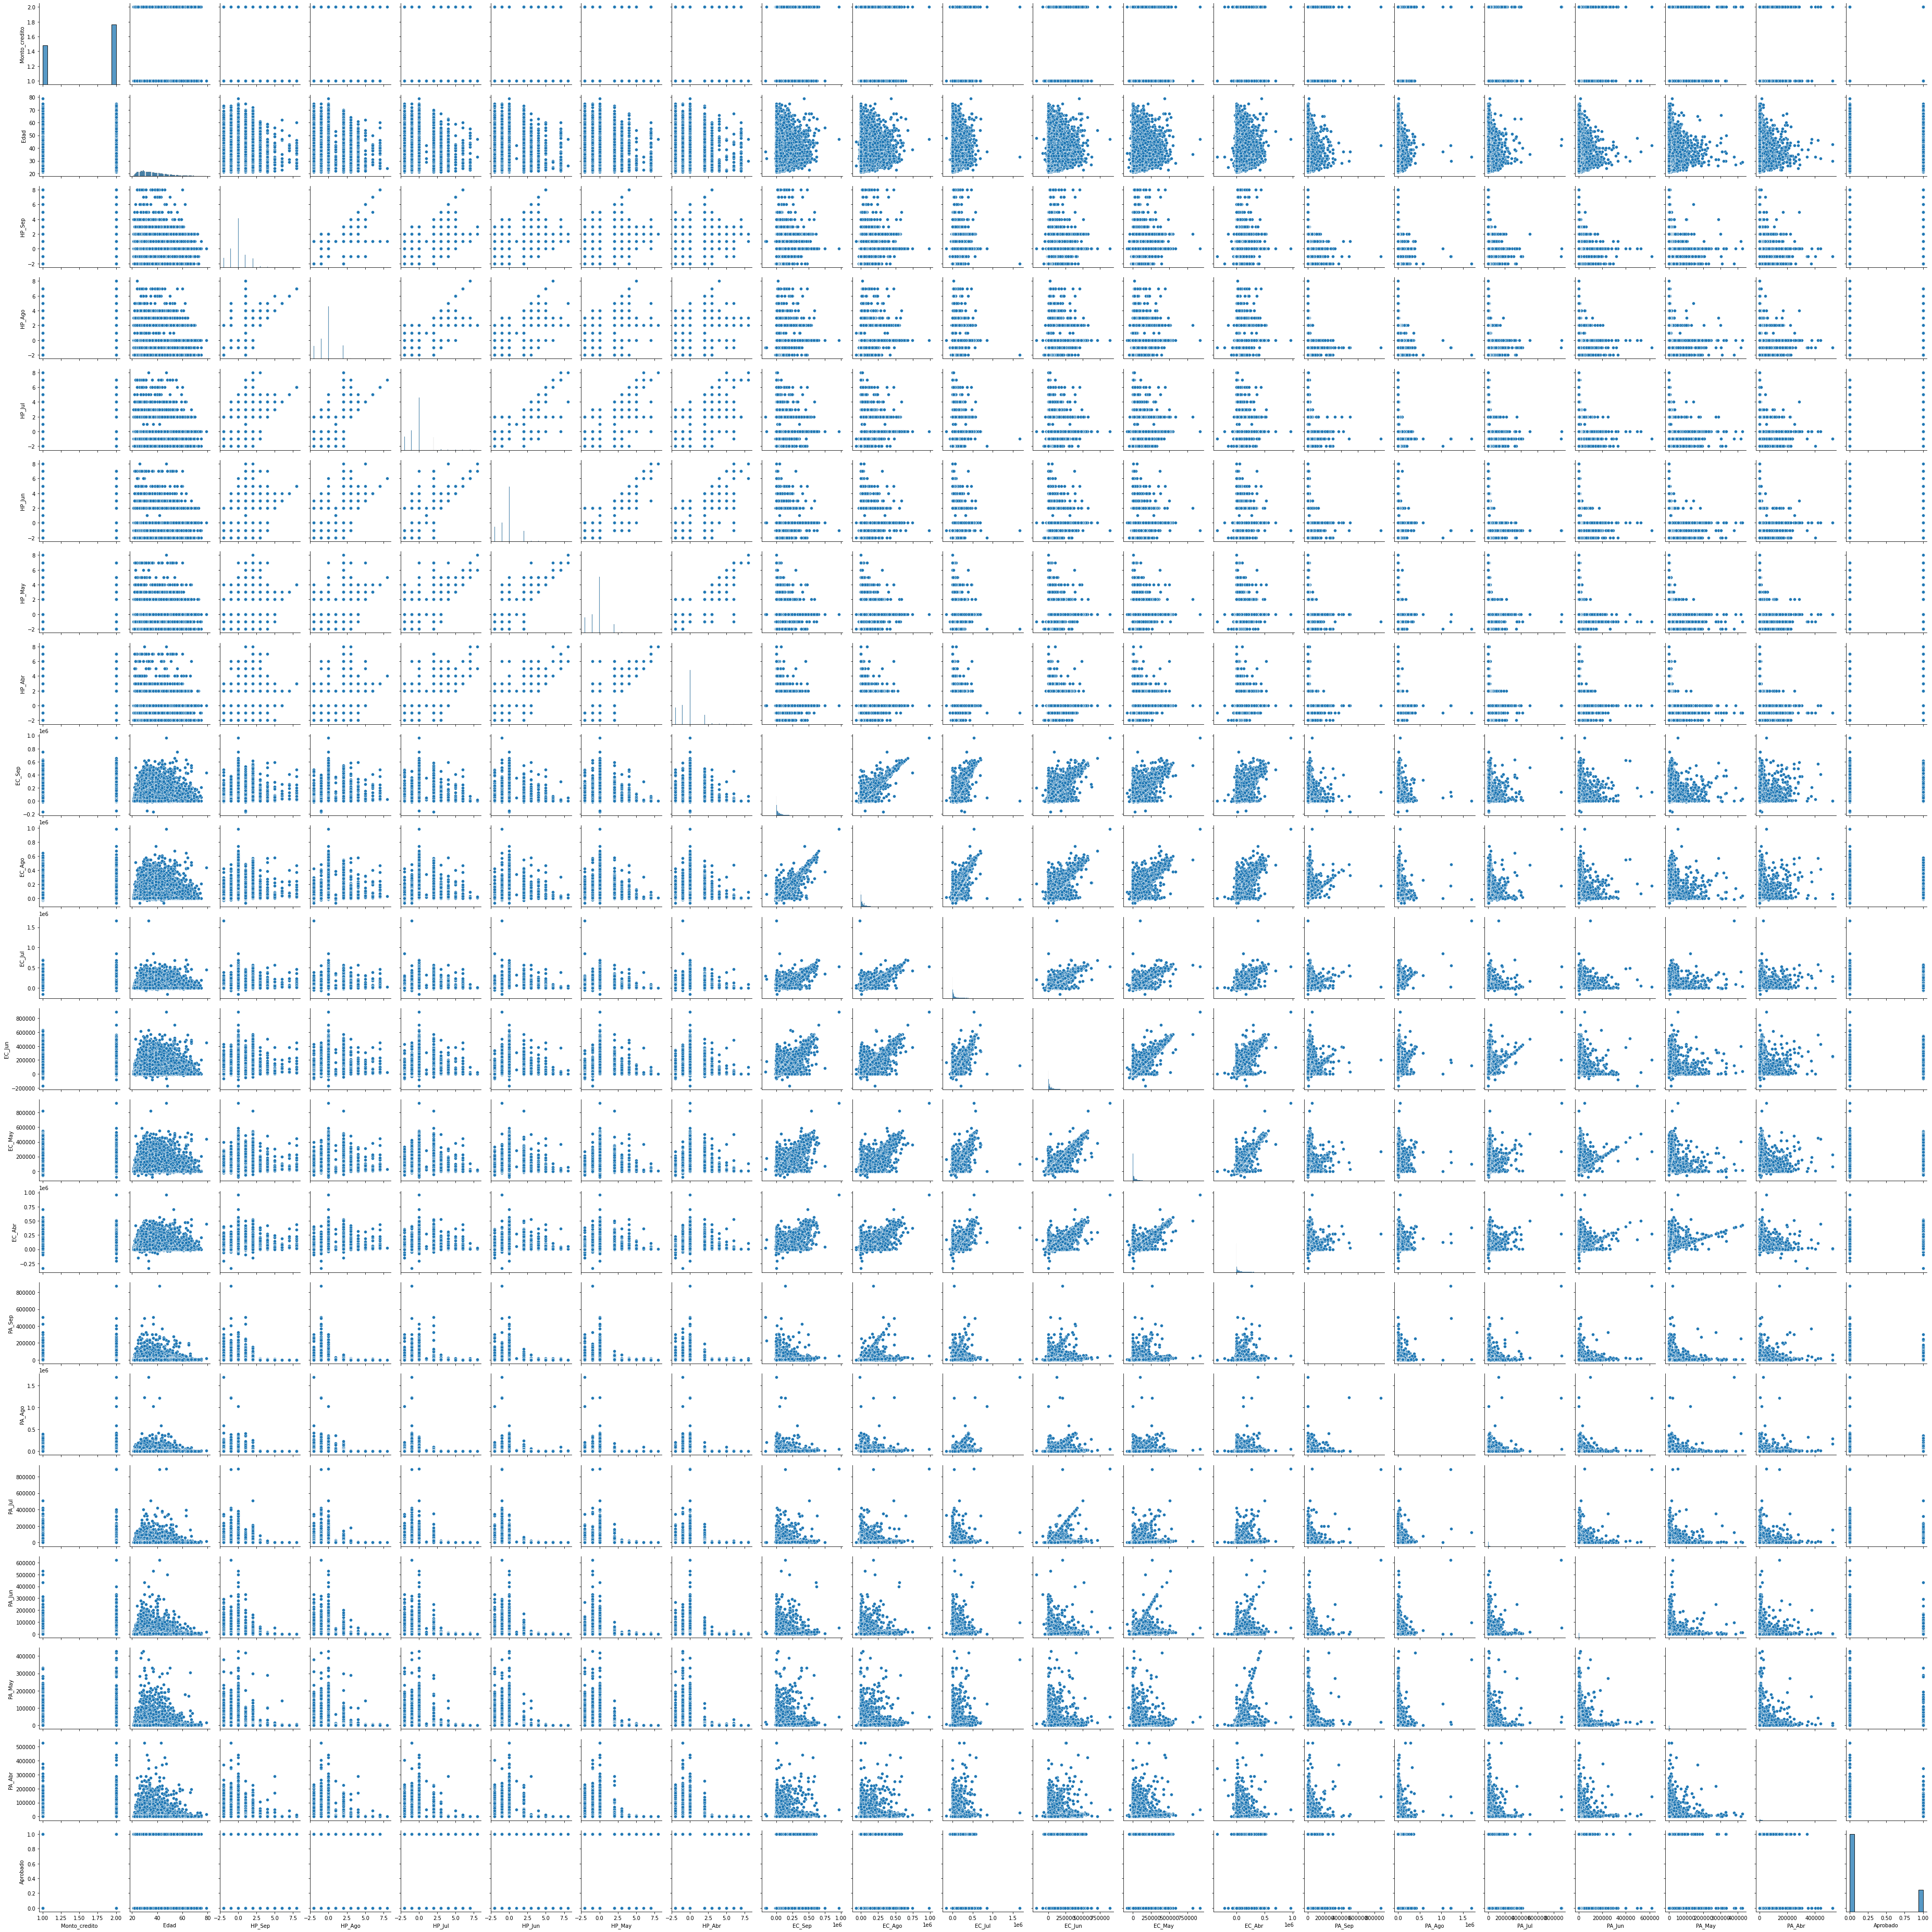

In [20]:
# Se observa la distribución y escala de los datos en los datos numericos
sns.pairplot(df[numeric_features])

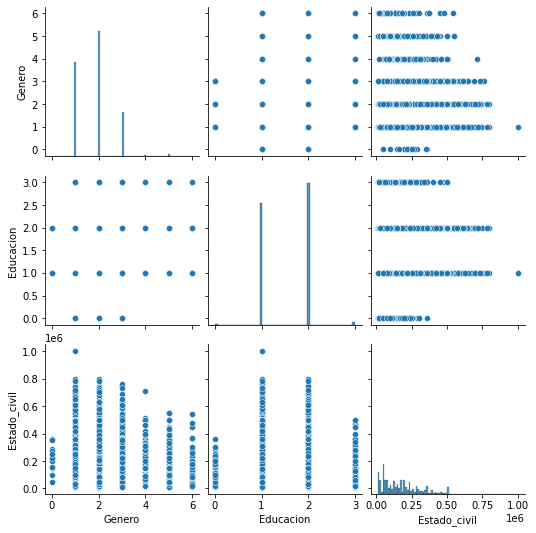

In [21]:
# Se observa la distribución y escala de los datos en los datos categoricos 
sns.pairplot(df[categorical_features])

5. Realiza el conteo de las variables categóricas

In [116]:
df[categorical_features].columns

Index(['Genero', 'Educacion', 'Estado_civil'], dtype='object')

In [117]:
df['Genero'].value_counts()

2.0    18113
1.0    11887
Name: Genero, dtype: int64

In [24]:
df['Educacion'].value_counts()

2.0    15966
1.0    13657
3.0      323
0.0       54
Name: Educacion, dtype: int64

In [25]:
df['Estado_civil'].value_counts()

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: Estado_civil, Length: 81, dtype: int64

6. Escala los datos, si consideras necesario

In [118]:
#features = df.drop(columns=['Aprobado'])
features =df.columns.drop('Aprobado')
target = ['Aprobado']

In [119]:
X = df.copy().drop(columns='Aprobado')
y = df['Aprobado']

In [120]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


7. Reduce las dimensiones con PCA, si consideras necesario.

In [121]:
# The PCA model
pca = PCA(n_components=5) # estimate only 5 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space
print("Dimensiones de X_new con PCA: ",X_new.shape)

Dimensiones de X_new con PCA:  (30000, 5)


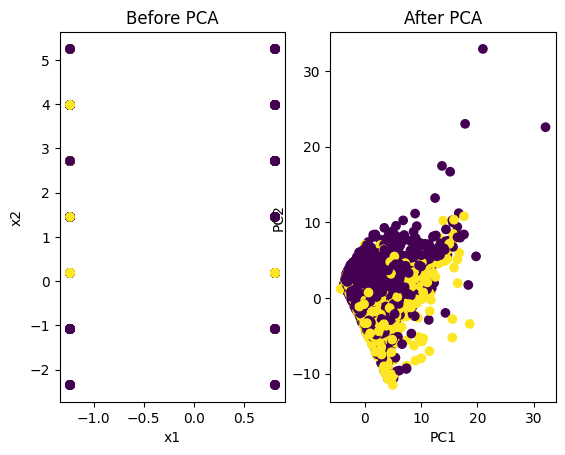

In [122]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

8. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [123]:
#Se detalla que la varianza máxima para cada PC(Componente Principal)
print(pca.explained_variance_ratio_)

[0.28446602 0.17817684 0.06743707 0.06400203 0.04457953]


In [124]:
#Se observa que estos valores (en la diagonal tenemos las varianzas) 
#son iguales a los valores propios reales de la covarianza almacenada en:
pca.explained_variance_

array([6.54293657, 4.09820402, 1.55110424, 1.47209573, 1.02536343])

9. Indica la importancia de las variables en cada componente

In [125]:
#A continuación se muestra la importancia de cada variable para cada componente
print(df.columns.drop('Aprobado'))
print(np.round(abs( pca.components_ ),3))

Index(['Genero', 'Educacion', 'Estado_civil', 'Monto_credito', 'Edad',
       'HP_Sep', 'HP_Ago', 'HP_Jul', 'HP_Jun', 'HP_May', 'HP_Abr', 'EC_Sep',
       'EC_Ago', 'EC_Jul', 'EC_Jun', 'EC_May', 'EC_Abr', 'PA_Sep', 'PA_Ago',
       'PA_Jul', 'PA_Jun', 'PA_May', 'PA_Abr'],
      dtype='object')
[[0.022 0.019 0.006 0.069 0.014 0.161 0.194 0.2   0.207 0.211 0.206 0.334
  0.346 0.35  0.354 0.352 0.345 0.094 0.079 0.086 0.078 0.075 0.07 ]
 [0.031 0.092 0.043 0.316 0.067 0.298 0.335 0.344 0.345 0.332 0.306 0.14
  0.14  0.146 0.145 0.144 0.142 0.149 0.14  0.152 0.141 0.137 0.129]
 [0.024 0.316 0.453 0.017 0.462 0.017 0.018 0.061 0.089 0.109 0.111 0.151
  0.127 0.084 0.071 0.057 0.048 0.282 0.302 0.28  0.237 0.194 0.209]
 [0.078 0.247 0.445 0.07  0.463 0.016 0.05  0.084 0.109 0.116 0.11  0.168
  0.149 0.105 0.101 0.089 0.084 0.28  0.311 0.278 0.236 0.176 0.207]
 [0.884 0.365 0.053 0.15  0.164 0.035 0.037 0.024 0.007 0.002 0.012 0.013
  0.005 0.03  0.023 0.022 0.01  0.093 0.108 0.036 0.014 0.05

In [126]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

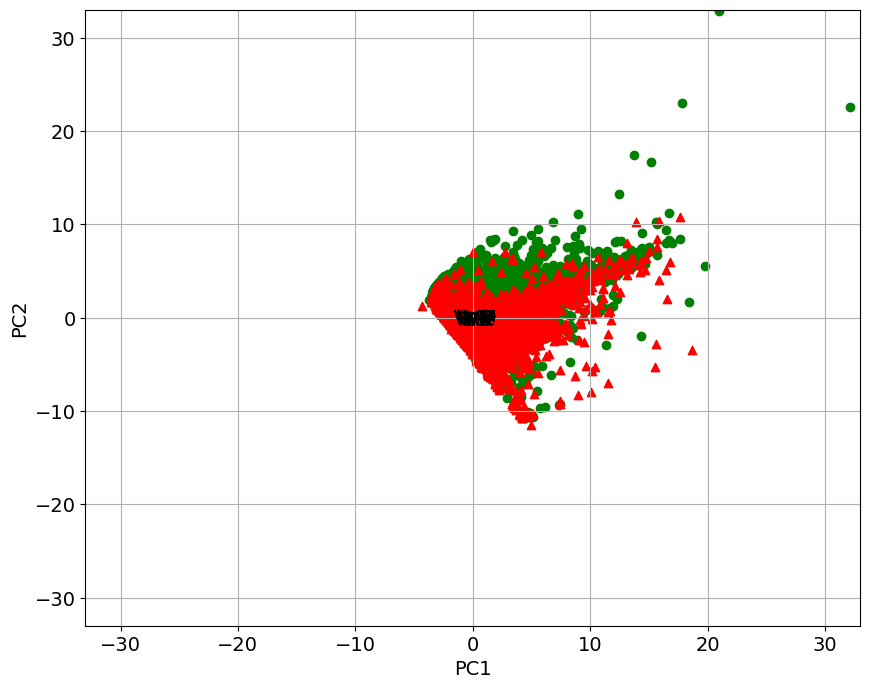

In [127]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

10. Elabora los histogramas de los atributos para visualizar su distribución

(array([ 2., 17.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-0.16407975, -0.05927425,  0.04553125,  0.15033675,  0.25514225,
         0.35994775,  0.46475325,  0.56955875,  0.67436425,  0.77916975,
         0.88397525]),
 [<matplotlib.patches.Polygon at 0x21d946ca6d0>])

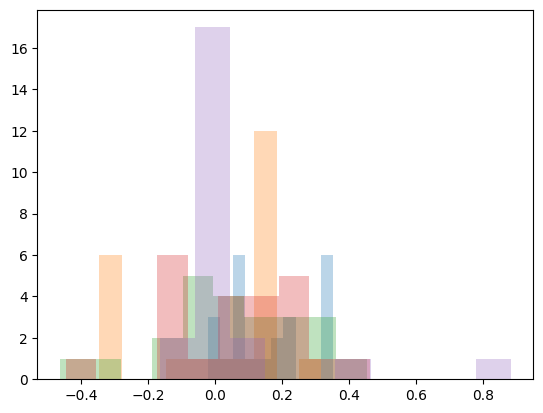

In [128]:
kwargs = dict(histtype='stepfilled', alpha=0.3)
plt.hist(pca.components_[0], **kwargs)
plt.hist(pca.components_[1], **kwargs)
plt.hist(pca.components_[2], **kwargs)
plt.hist(pca.components_[3], **kwargs)
plt.hist(pca.components_[4], **kwargs)

C:\Users\luish\AppData\Local\Temp\ipykernel_21172\3583888619.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<AxesSubplot:title={'center':'Genero'}>,
        <AxesSubplot:title={'center':'Educacion'}>,
        <AxesSubplot:title={'center':'Estado_civil'}>,
        <AxesSubplot:title={'center':'Monto_credito'}>,
        <AxesSubplot:title={'center':'Edad'}>],
       [<AxesSubplot:title={'center':'HP_Sep'}>,
        <AxesSubplot:title={'center':'HP_Ago'}>,
        <AxesSubplot:title={'center':'HP_Jul'}>,
        <AxesSubplot:title={'center':'HP_Jun'}>,
        <AxesSubplot:title={'center':'HP_May'}>],
       [<AxesSubplot:title={'center':'HP_Abr'}>,
        <AxesSubplot:title={'center':'EC_Sep'}>,
        <AxesSubplot:title={'center':'EC_Ago'}>,
        <AxesSubplot:title={'center':'EC_Jul'}>,
        <AxesSubplot:title={'center':'EC_Jun'}>],
       [<AxesSubplot:title={'center':'EC_May'}>,
        <AxesSubplot:title={'center':'EC_Abr'}>,
        <AxesSubplot:title={'center':'PA_Sep'}>,
        <AxesSubplot:title={'center':'PA_Ago'}>,
        <AxesSubplot:title={'center':'PA_Jul'}>],
  

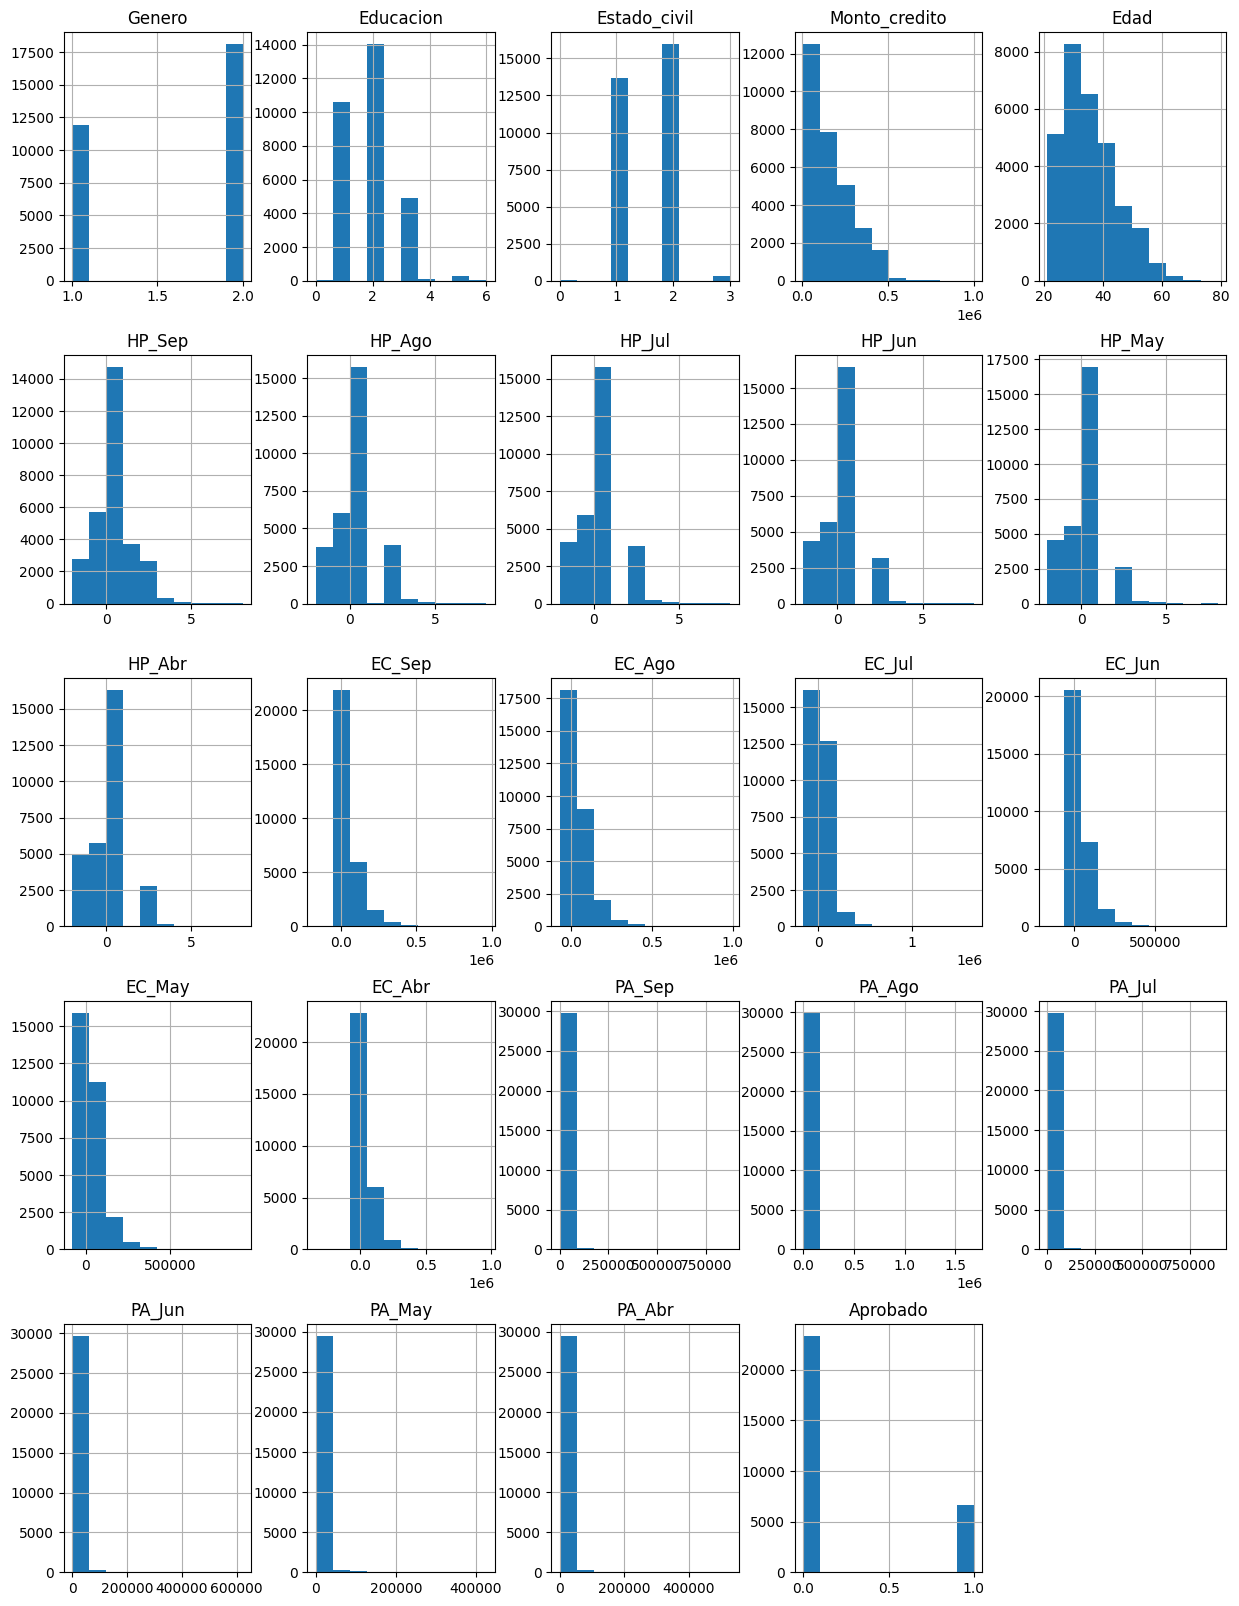

In [131]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)


11. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

12. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

In [146]:
#Visualización con Scatter
fig = px.scatter_matrix(
    df,
    dimensions=['Monto_credito', 'Edad','HP_Ago', 'HP_Jul', 'HP_Jun', 'HP_May', 'HP_Abr'],
    color="Aprobado"
)
fig.update_traces(diagonal_visible=False)
fig.show()

#La visualización con scatter nos da un panorama sobre como se encuentran dispersos nuestros datos 
#al realizar ciertas combinaciones entre características, nos da un panorama visual sobre que tan fuerte son las correlaciones

{'whiskers': [<matplotlib.lines.Line2D at 0x21da52f9250>,
 'caps': [<matplotlib.lines.Line2D at 0x21da52f97f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21da52edf40>,
 'medians': [<matplotlib.lines.Line2D at 0x21da52f9d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x21da53040a0>,
 'means': []}

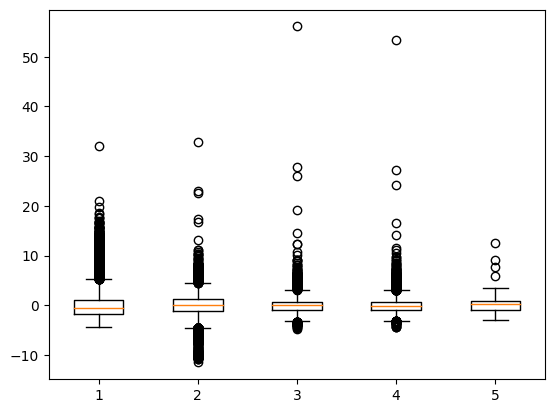

In [151]:
#Boxplot de los componentes
plt.boxplot(X_new)
#La visualización mostrada acontinuación nos permite observar si existen valores atipicos dentro de cada uno de nuestros componentes

D:\System_Programs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\System_Programs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



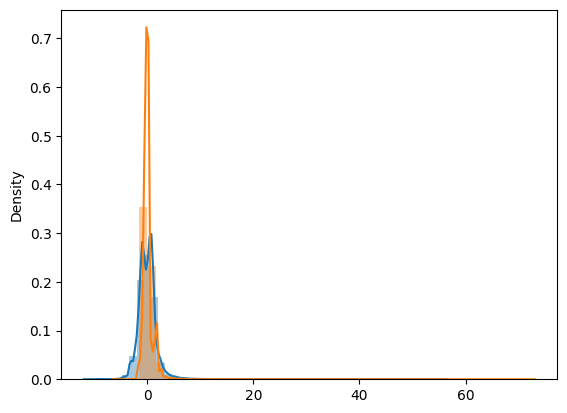

In [167]:
#Displot
sns.distplot(X_new)
sns.distplot(X);
# Finalmente nuestra gráfica de distribución nos permite hacer una comparación entre los datos iniciales 
#y los datos utilizando componentes, como bien se puede visualizar se observa una tendecia entre ambos valores